# 《合成孔径雷达成像——算法与实现》中2.5.2 实信号与复信号(图2.6的Python实现）

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [9]:
T = 1;
dt = 1/400;
fs = 1/dt;
f0 = 15;
ft = 100;
BW = 75;#%带宽75Hz
k = BW/T;#%斜率为带宽时间比
t = np.arange(0,1,dt)

N  = t.size

p0 = t+3;
p_max = np.max(p0);
p = p0/p_max;

先对确定各个参数，其中带宽书中给出，图的形状为$cos(at+bt^2)$然后再乘一个削减系数，复数情况为exp(1j*)函数。

d:\anaconda3\envs\stock\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
d:\anaconda3\envs\stock\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


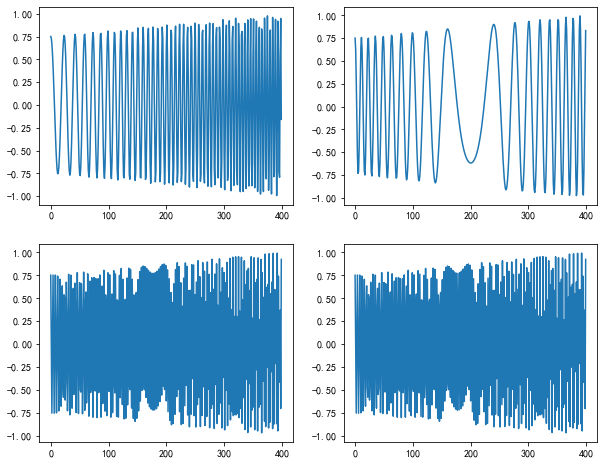

In [10]:
s1 = np.cos(2*np.pi*(f0*t+0.5*k*t**2))*p;
s2 = np.exp(1j*2*np.pi*((f0-52.5)*t+0.5*k*t**2))*p;
s3 = np.cos(2*np.pi*(ft*t+0.5*k*t**2))*p;
s4 = np.exp(1j*2*np.pi*(ft*t+0.5*k*t**2))*p;

#%% 原信号绘图
plt.figure(figsize=(10,8))
plt.subplot(2,2,1);plt.plot(s1);
plt.subplot(2,2,2);plt.plot(s2);
plt.subplot(2,2,3);plt.plot(s3);
plt.subplot(2,2,4);plt.plot(s4);

这里为原信号加上的系数，即图中傅里叶变换图像额有一定的斜率，p0=t+a，a越大，斜率越大，然后进行归一化即可。这部分代码再建立信号之前。

In [11]:
#傅里叶变换
F1_1 = np.fft.fftshift(np.fft.fft(s1,N));
F1 = F1_1/np.max(np.abs(F1_1));
F2_2 = np.fft.fftshift(np.fft.fft(s2,N));
F2 = F2_2/np.max(np.abs(F2_2));
F3_3 = np.fft.fftshift(np.fft.fft(s3,N));
F3 = F3_3/np.max(np.abs(F3_3));
F4_4 = np.fft.fftshift(np.fft.fft(s4,N));
F4 = F4_4/np.max(np.abs(F4_4));


Text(0.5, 1.0, '(d)复&非基带')

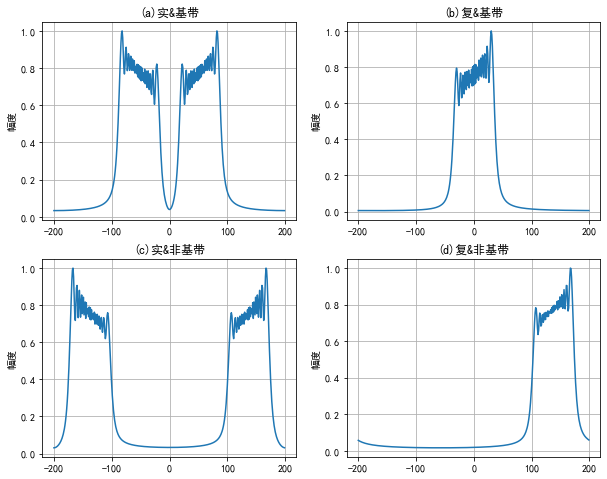

In [12]:
#%% 绘图
f = np.arange(-fs/2,fs/2,fs/N)
fig = plt.figure(figsize=(10,8))
plt.subplot(2,2,1); plt.plot( f,abs(F1));plt.grid()
plt.ylabel('幅度'); plt.title('(a)实&基带')
plt.subplot(2,2,2); plt.plot( f,abs(F2));plt.grid()
plt.ylabel('幅度'); plt.title('(b)复&基带')
plt.subplot(2,2,3); plt.plot( f,abs(F3));plt.grid()
plt.ylabel('幅度'); plt.title('(c)实&非基带')
plt.subplot(2,2,4); plt.plot( f,abs(F4));plt.grid()
plt.ylabel('幅度'); plt.title('(d)复&非基带')

